The Basics of Machine Learning<p>
$LWM^3$ 27 Feb 2020

# The Stratigraphy of AI
1. Machine Learning
    * Supervised Learning
    * Unsupervised Learning
    * Reinforced Learning
2. Deep Learning
    * Aritfical Neural Nets
    * Convolution

# Three Categories of ML
1. Supervised learning<p>
Write code that predicts an outcome (this is spam email, this is not; this combination of factors predicts student A will earn a C in Calc I; this student an A), based on a training set of data. The outcome of the training set is known *a priori*; no exploration of the data for a signal is needed.
    * Labeled Data
    * Direct feedback
    * Classify new data with label
    
   Sub-categories
   * Classification: discrete output
   * Regression: continuous output
       * Predictor variables $\equiv  $ *feature variable*
       * Response variables $\equiv $ *target variables*
2. Reinforcement learning<p>
Write code (called an "agent") that iteratively learns vs. trial an error to associate certain states of an environemnt (a chess board, a traffic pattern, a series of trades on a market) with a feedback signal (the reward) which occur as a result of an action the agent takes. The reward is known *a priori*; one either wins or loses a chess game, traffic delays of a certain magnitude emerge, wins or losses occurr.
    * Decision process
    * Reward sytem
    * Learn(ed) series of actions
3. Unsupervised learning
    * No Labels
    * No Feedback
    * Find hidden structure in data


# Supervised learning: an example
## The Perceptron
As noted by wiki...
"In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.[1] It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector."<p>
Algorithm invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt, funded by the United States Office of Naval Research. The perceptron is limited (capable of linear discrimination only) and is no longer used in practice. But its elegant simplicity and mathematical tractability make it "hand-doable" and an excellent way of learning how machines learn.<p>

## A slight digression into geometry
You all know the equation of a striaght line, I assume, $y=mx+b$? Let's play with that for a second.
$$ y=mx+b $$
But we call our observe data *Features.* So, re-write $x=F_1$, $y=F_2$ and
$$ F_2=mF_1+b $$
The intercept somewhat annoying...it doesn't have a feature associated with it. So let's multiply it by *1,* and call that value $Feature_0$
$$ \begin{align}
F_2&=mF_1+b\\
F_2&=mF_1+b1\\
F_2&=mF_1+bF_0
\end{align}$$
Bring $F_2$ to the r.h.s.
$$ \begin{align}
0&=mF_1- F_2 +bF_0
\end{align}$$
Poor $F_2$, it suffers from the opposite problem b had...no coefficient. No matter, we'll multipl both sides by some constant we'll call a *weight.* In this case, we'll multiply by $-w_2$. Sure, seems random, Go with me.
$$ \begin{align}
0&=-mw_2F_1+ w_2F_2 -bw_2F_0
\end{align}$$
Let's call the coeffcients on F_1 and F_0 weights as well, to make everything nice and neat. Define
$$ \begin{align}
w_1&=-mw_2\\
w_0&=-bw_2\\
0&=w_1F_1+ w_2F_2 +w_0F_0
\end{align}$$
So,  straight line is not just $y=mx+b$, it is also those points on a plane where 
$$ \begin{align}
0&=w_1F_1+ w_2F_2 +w_0F_0\\
\text{Where, }\\
m&=-w_1/w_2\\
b&=-w_0/w_2
\end{align}$$
We can use such a form to seperate two groups of things plotable on a plane (higher dimensions allowed, just add another Feature). This might be easiest to see in Excel (!) Please open Perceptron.xls, and focus your attention to the upper right corner.

## Algorithm Flow
0. Assemble training data
    * Data can have any number of *features*, which we'll index by i.
    * Data can have any number of observations, or points, which we'll index by j.
    * Data must belong to one of two *classes,* which we'll designate as -1 and 1.
    * Randomize the order of the observation<p>

1. Create a *Feature 0* for each observation
    * This is a *bias* term, esentially a constant
    * $F_{0,j}=1$
    * Or, in English, set Feature 0 equal to 1 for all observations $j=1, 2, 3...j_{max}$.<p>

2. Assign initial *weights,* one for each feature
    * Typically $w_i=N(0,small)$
    * Or, in English, set weight for each feature $i=0, 1, 2...i_{max}$ to a random number drawn from a normal distribution with mean 0 and a small standard deviation, 0.01 to 0.1.<p>
    
3. Repeat the following loop until some "end" condition is reached, running through each data point in turn
    1. Locate the data point
        * find 
\begin{align}
S_j=\sum w_i \cdot F_{i,j}
\end{align}
        * Or, in English, find for each observation j: $S_j=w_0 \cdot F_{0,j}+w_1 \cdot F_{1,j}+w_2 \cdot F_{2,j}+... w_{i_{max}} \cdot F_{{i_{max}},j}$
        * This step converts the coordnates of a point to a "lever arm," which will help tilt the next generation of weights in a way that will tume them to seperate the groups.
    2. Predict which group the observation belongs to, by using a threshold function based on the value of S.
        $$
\begin{align}
 P_j=\begin{cases}
    1, & \text{if $S_j>0$}.\\
    -1, & \text{if $S_j \leq 0$}.
  \end{cases}
\end{align}
        $$
    3. Change the weights, based on whether the observation was correctly classified.
        * If the *predicted* class is correct, weights are good, do nothing
        * But is the *predicted* class is wrong, change the weights in the direction that will improve next prediction
        * This is the AI, the learning step. 
        * $ \Delta w_i=r \cdot (C_j-P_j) \cdot F_{i,j}$
        * $r$ is the *learning rate*, where $0<r<1$. The rate has to be large enough to allow the loop to end, but small enough to prevent wild oscillations. Start with $r=0.1$
        * Let's work through this by hand. Assume that observation 2 is classed as $C_2=-1$, and imagine two outcomes for $P_2$:
        \begin{align}
 P_2=
 \begin{cases}
    1 \text{ (prediction incorrect)}, & \Delta w_i=r \cdot (-1-1) \cdot F_{i,j}&=r \cdot (2) \cdot F_{i,j}= 2rF_{i,j}\\
    -1 \text{ (prediction correct)}, & \Delta w_i=r \cdot (-1-(1)) \cdot F_{i,j}&=r \cdot (0) \cdot F_{i,j}= 0 
  \end{cases}
       \end{align}
        * If the weights give a correct prediction, no change. But if they don't give the correct prediction, the weights are changed, and in a direction likely to lead to better prediction, by a proportion of $2r$ of the Feature value.

## Let's practice with some data. 

1 2 7 1 1
1 4 7 1 3
1 3 6 1 5
1 2 5 1 7
1 6 5 -1 2
1 5 4 -1 4
1 4 3 -1 6
1 6 3 -1 8


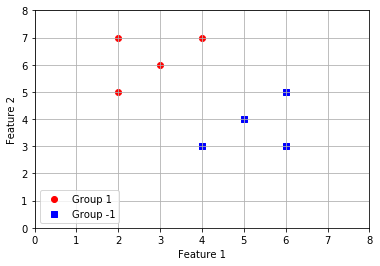

In [1]:
#steps 1 and 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# We'll create an array of the data we need...thi is NOT the best way to organize the data, but it works.
# Columns are Feature 0 = 1 (always), Feature 1 (x-value), Feature 2(y value), Group, analysis order (see below)
df=np.array([[1,2,7,1,1], [1,4,7,1,3], [1,3,6,1,5], [1,2,5,1,7], [1,6,5,-1,2], [1,5,4,-1,4], [1,4,3,-1,6], [1,6,3,-1,8]])
for line in df:
    print(*line)
# plot data
plt.scatter(df[0:4,1], df[0:4,2],
            color='red', marker='o', label='Group 1')
plt.scatter(df[4:8,1], df[4:8,2],
            color='blue', marker='s', label='Group -1')
plt.xlim(0.,8.)
plt.ylim(0.,8.)
#plt.axes().set_aspect('equal')
plt.grid(True)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='lower left')

In [2]:
# Ideally one interleaves the classes. let's sort df by analysis order (coulumn 1) 
df=df[df[:,-1].argsort()]
# In English: replace df with df sorted by the values in all rows of column last
for line in df:
    print(*line)
      

1 2 7 1 1
1 6 5 -1 2
1 4 7 1 3
1 5 4 -1 4
1 3 6 1 5
1 4 3 -1 6
1 2 5 1 7
1 6 3 -1 8


In [3]:
#we'll find it helpful to keep track of the weights and the predicted class membership. Pre-define an array to hold the weights, which change on each update
# to do tis we'll need the shape of the data array.
data_shape=np.shape(df)
data_shape
# Create an empty array of same number of rows and columns; we'll go through the array at least once.

(8, 5)

In [4]:
# Step 3: Assign weights
rgen = np.random.RandomState(100)# Sets rng to a fixed seed so we all get the same values
weights=rgen.normal(loc=0.0, scale=0.01, size=3)# mean, std, number of values
weights

array([-0.01749765,  0.0034268 ,  0.01153036])

In [5]:
#find S1: w_0 *F_{0,1}+w_1 *F_{1,1}+w_2*F_{2,1}
S1=sum(weights*df[0,1:4])
S1

0.000522676797467642

In [6]:
# Put S1 into the Prediction engine
P1=np.sign(S1)# the sign(x) command returns 1 for x>0, 0 for x=0, -1 for x<0. A nice way to evalaute S
P1

1.0

In [7]:
# Update the weights
r=0.1
deltaw0=r*(df[0,4]-P1)*df[0,1] # recall that Python's really awesome indexing starts with 0. So
# df[0,3] is the first row, fourth column of the area...the class of the first observation
deltaw0 # note that the weight change is 0, as the prediction is correct
weights
weights[0]=weights[0]+deltaw0
weights[0]

-0.017497654730546975

In [8]:
# update weight_1 and weight_2; better, calculate all delta weights in one command...
deltaw1=r*(df[0,4]-P1)*df[0,2]
deltaw1
weights[1]=weights[1]+deltaw1
weights[1]

0.0034268040332750215

In [9]:
deltaw2=r*(df[0,4]-P1)*df[0,3]
deltaw2
weights[2]=weights[2]+deltaw2
weights[2]

0.01153035802563644

Now repeat for observation 5, the first observation classified as Group "-1".
use the subscript 2 in your calculations. Do all steps in this cell.


In [10]:
S2=sum(weights*df[1,1:4])
P2=np.sign(S2)# the sign(x) command returns 1 for x>0, 0 for x=0, -1 for x<0. A nice way to evalaute S
r=0.1
deltaw0=r*(df[0,4]-P1)*df[0,1] 
print(deltaw0) # note that the weight change is 0, as the prediction is correct
print(weights)
weights[0]=weights[0]+deltaw0
print(weights)

0.0
[-0.01749765  0.0034268   0.01153036]
[-0.01749765  0.0034268   0.01153036]
